In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.utils import shuffle
import pickle
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
seed = 124
InputPath = "data/"
X = pickle.load(open(InputPath+"X2_weighted.pickle","rb"))
y = pickle.load(open(InputPath+"y2_weighted.pickle","rb"))
X,y=shuffle(X,y, random_state=seed)
X = X/255.0
y = tf.keras.utils.to_categorical(y).astype(int)
print(X.shape)
print(y.shape)
print(np.amax(X))

print(np.amin(X))

(2279, 38, 38, 3)
(2279, 5)
1.0
0.0


In [3]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=seed)

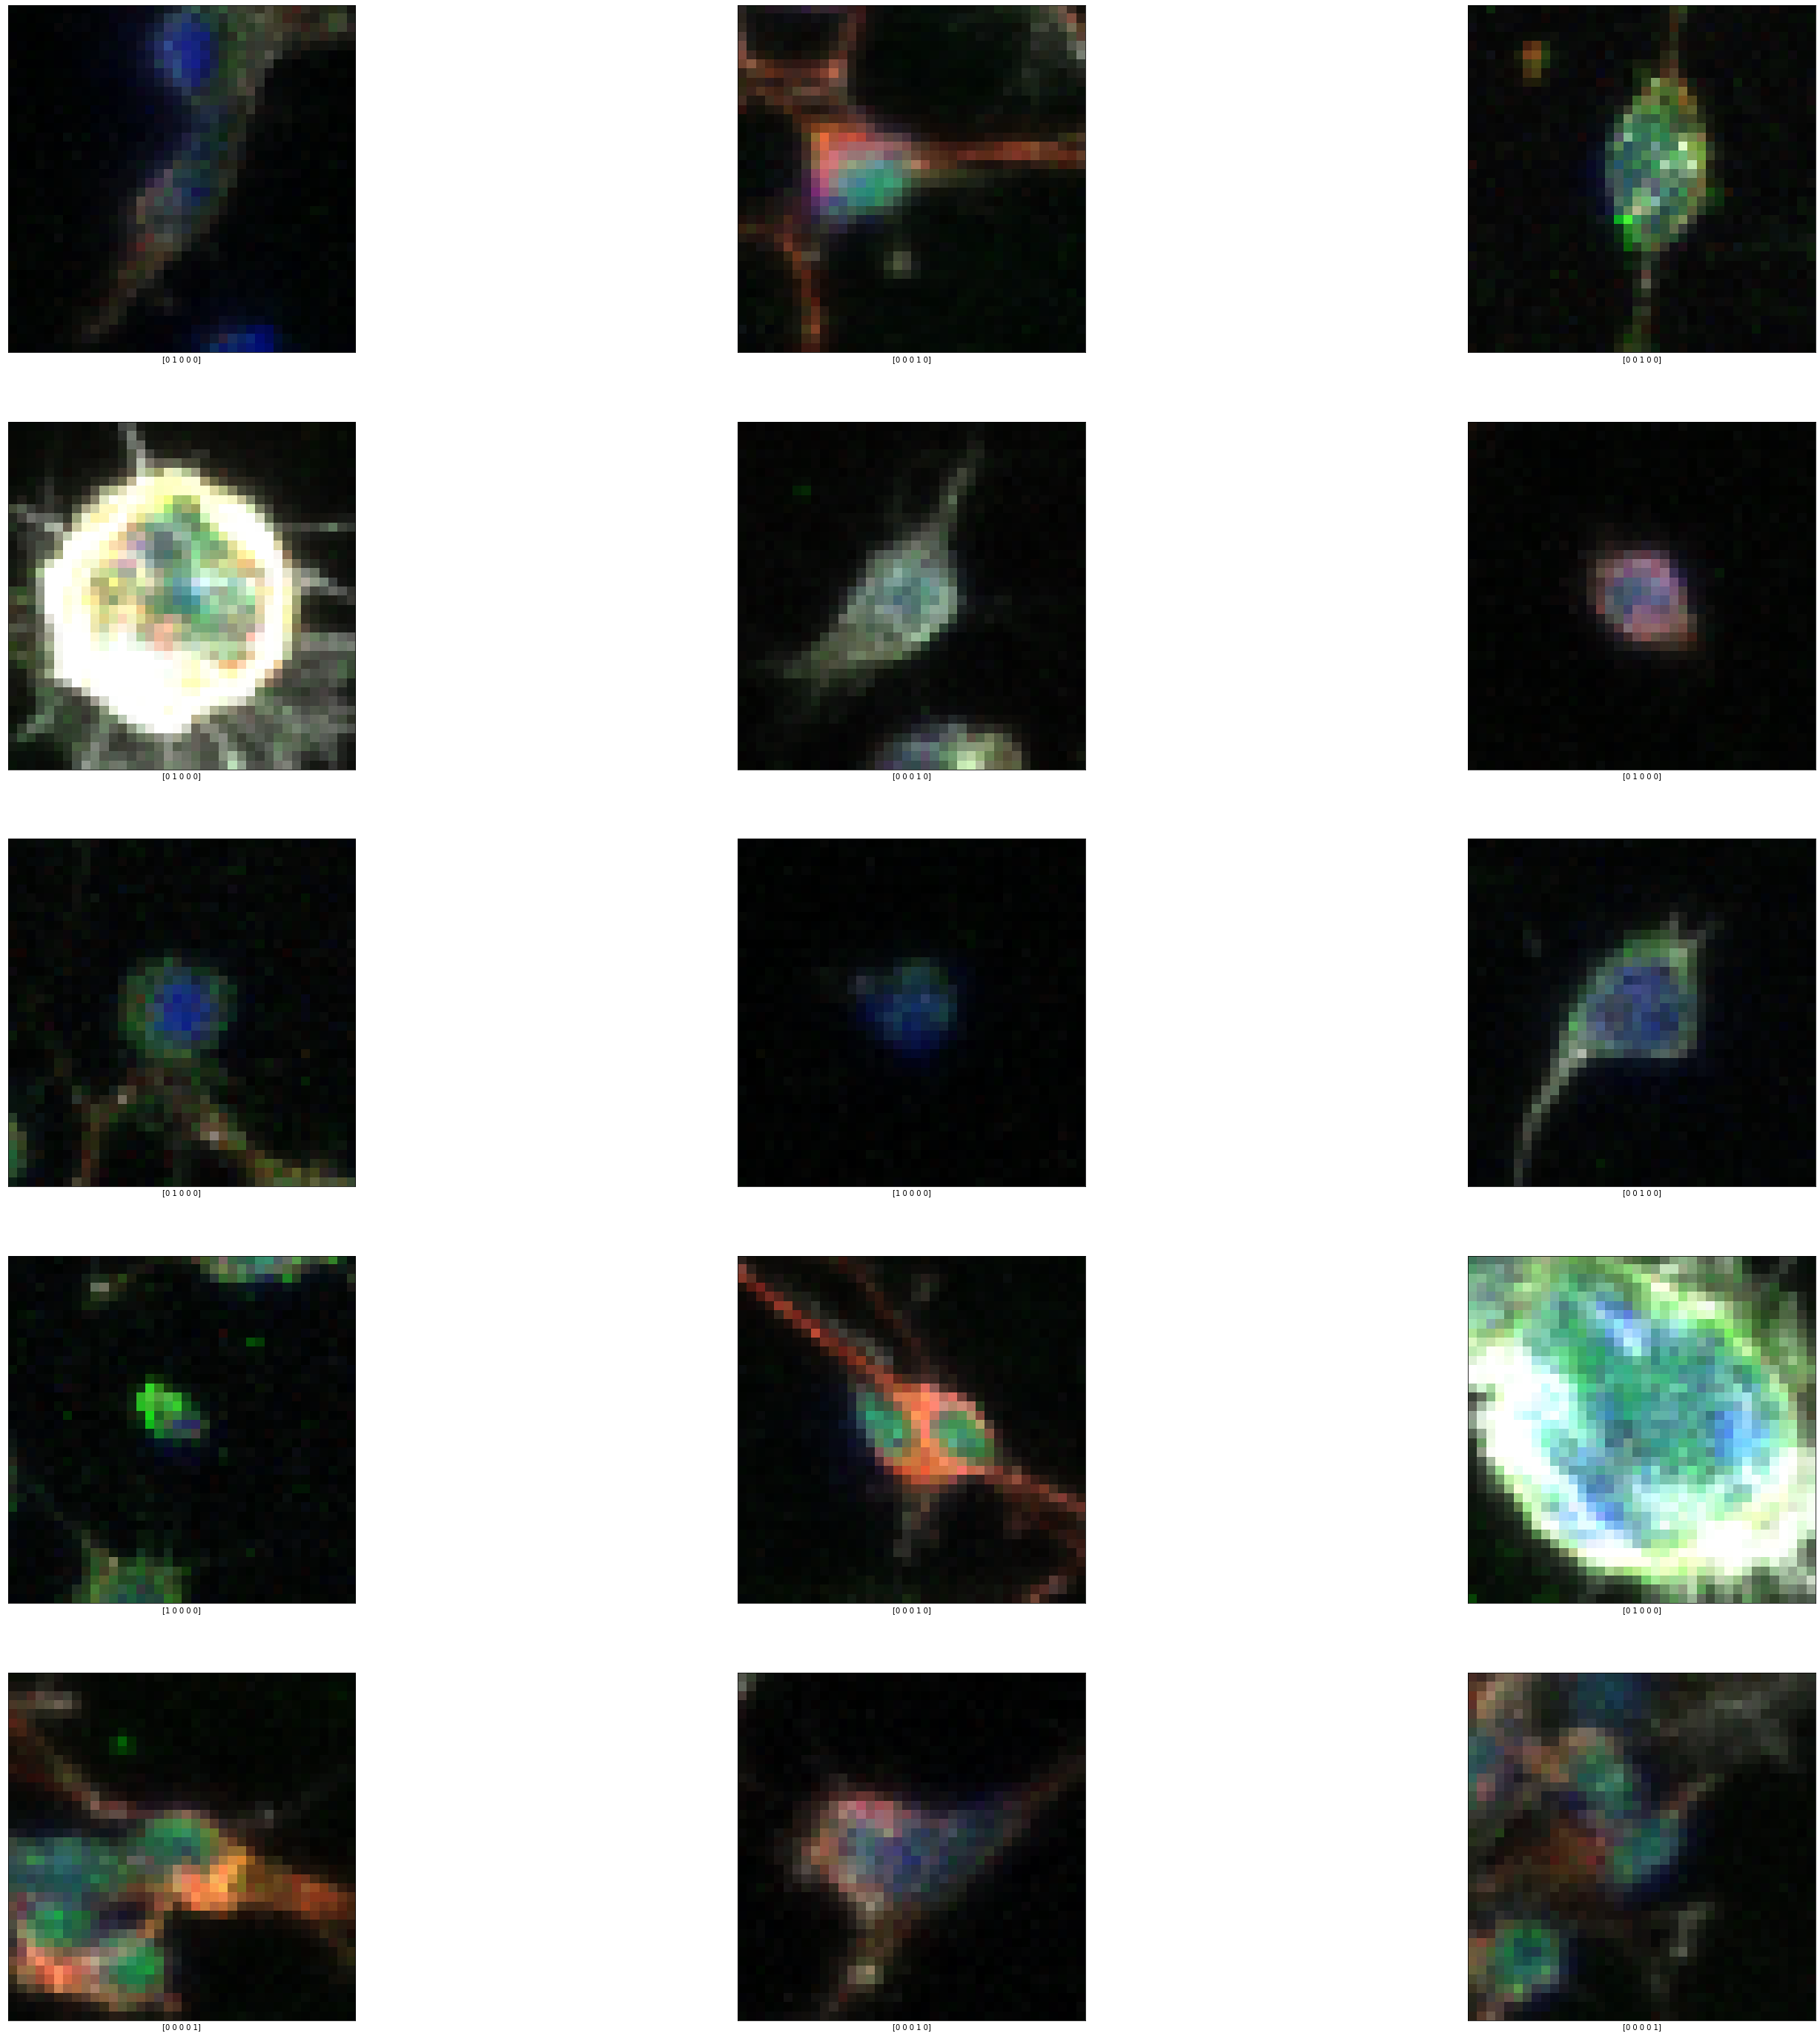

In [4]:
plt.figure(figsize=(50,50))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(str(train_y[i]))
plt.show()

In [5]:
# NAME = "Cnn64x2-{}-fix_X_withActivation".format(int(time.time()))
# from models import simple_cnn_model
# model = simple_cnn_model()
# model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(), metrics=['accuracy'])
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
# gpu_option = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [7]:
weights = [301, 493, 531, 329, 628]
total = sum(weights)
weights[:] = [x / total for x in weights]
print(weights)
classWeights = { i : weights[i] for i in range(0, len(weights) ) }
classWeights

[0.13190184049079753, 0.21603856266432953, 0.2326906222611744, 0.1441717791411043, 0.2751971954425942]


{0: 0.13190184049079753,
 1: 0.21603856266432953,
 2: 0.2326906222611744,
 3: 0.1441717791411043,
 4: 0.2751971954425942}

In [8]:
NAME = "VGG-updated_{}".format(int(time.time()))
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

In [9]:
from models import VGG_16
model = VGG_16()
adam = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam, loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 40, 40, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 38, 38, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 38, 38, 64)        256       
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 19, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 21, 21, 64)        0

In [13]:
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=False) 

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                            rotation_range=10,
                             width_shift_range=2,
                             height_shift_range=2,
                             horizontal_flip=True, 
                             vertical_flip=True,
                            )

In [15]:
datagen.fit(train_X)

0.0011399977 0.84977096 0.07421317 0.09475443
0.0 0.7507274 0.075431615 0.10394439
0.0041533797 0.9963658 0.058285136 0.104968295
0.005877473 0.93757606 0.093597636 0.101670705
0.004697711 0.40189204 0.06405982 0.063409775
0.005784189 0.7649471 0.11725809 0.10162239
0.0 0.9993142 0.07304178 0.14443551
0.00020786918 0.44254488 0.07536061 0.08125349
0.012774959 0.84630126 0.14504495 0.12699759
0.0043692435 0.7348473 0.08548213 0.09526531
0.0048893667 0.4912086 0.07711036 0.07906715
0.0 0.5223101 0.021248916 0.04567227
0.007386724 1.0 0.33324176 0.30985668
0.0 0.77586913 0.07829816 0.10012176
0.0 0.55364275 0.034134105 0.05078244
0.003921569 0.9025126 0.13410886 0.14568982


/home/mzouink/miniconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


0.007843138 0.8342557 0.1996795 0.13622183
0.005432296 1.0 0.16943139 0.18881188
0.0 1.0 0.051770397 0.15007141
0.010386192 0.4391934 0.10588243 0.076709405
0.003930586 0.75000405 0.10780781 0.084269166
0.0 0.46568236 0.08596731 0.096831694
0.0 0.8116867 0.15081152 0.111365736
0.00045967303 0.61057615 0.07987627 0.09816955
0.0 0.47806117 0.034380477 0.0540017
5.080898e-05 0.86629736 0.08191892 0.10807968
0.003921569 0.98543483 0.120088786 0.17156368
0.0 0.43199056 0.0504925 0.06605747
0.0040827356 0.6716363 0.055695154 0.07794138
9.716748e-05 0.53404844 0.080494255 0.0839122
0.0018311407 0.5690818 0.061114714 0.08042894
0.008896824 0.97331613 0.17258303 0.14543389
0.0042626956 1.0 0.44719338 0.27994433
0.0 0.38566953 0.04265892 0.054587096
0.0 0.3168844 0.03345888 0.0428376
0.0132661555 0.671966 0.15207604 0.07968944


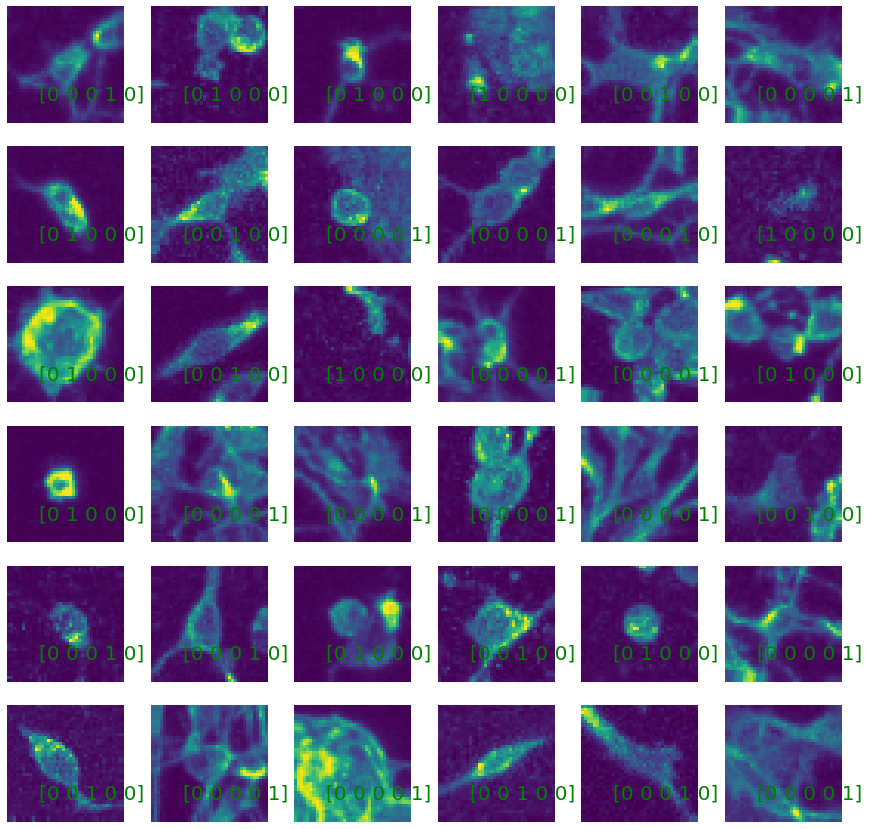

In [16]:
it = datagen.flow(train_X, train_y, batch_size=1)
plt.figure(figsize=(15,15))
plt.tight_layout()
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.axis('off')
    batch = it.next()
    image = batch[0]
    label = batch[1][0]
    print(np.min(image), np.max(image), np.mean(image), np.std(image))
    plt.imshow(image[0,:,:,0])
    plt.text(10,30,label, color='green', size=20)
plt.show()

In [17]:
import os
from datetime import datetime

# checkpoint_path = "models/"+NAME+"-{epoch:02d}-{val_acc:.2f}.hdf5"

checkpoint_path = "models/"+NAME+".hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=0, 
#                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
# checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=0, save_best_only=False, mode='max')
# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=1,
#     save_best_only=True, save_weights_only=False,save_frequency=100)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = "logs/scalars/" + NAME

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# import sys
# oldStdout = sys.stdout
# file = open('trainLog.txt', 'w')
# sys.stdout = file
history = model.fit(datagen.flow(train_X, train_y, batch_size=64), epochs=1000, 
                    validation_data=(test_X, test_y),class_weight=classWeights,callbacks=[cp_callback,tensorboard_callback])

Train for 29 steps, validate on 456 samples
Epoch 1/1000
28/29 [===========================>..] - ETA: 0s - loss: 1.5187 - accuracy: 0.2581
Epoch 00001: val_accuracy improved from -inf to 0.27193, saving model to models/VGG-updated_1580760476.hdf5
29/29 [==============================] - 9s 295ms/step - loss: 1.5173 - accuracy: 0.2589 - val_loss: 0.3469 - val_accuracy: 0.2719
Epoch 2/1000
28/29 [===========================>..] - ETA: 0s - loss: 1.4017 - accuracy: 0.3547
Epoch 00002: val_accuracy did not improve from 0.27193
29/29 [==============================] - 3s 104ms/step - loss: 1.4017 - accuracy: 0.3555 - val_loss: 0.3482 - val_accuracy: 0.2719
Epoch 3/1000
28/29 [===========================>..] - ETA: 0s - loss: 1.3722 - accuracy: 0.3860
Epoch 00003: val_accuracy did not improve from 0.27193
29/29 [==============================] - 3s 103ms/step - loss: 1.3702 - accuracy: 0.3867 - val_loss: 0.3505 - val_accuracy: 0.2719
Epoch 4/1000
28/29 [===========================>..] - ETA

29/29 [==============================] - 4s 152ms/step - loss: 0.7648 - accuracy: 0.7038 - val_loss: 0.1964 - val_accuracy: 0.6469
Epoch 28/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.7501 - accuracy: 0.7078
Epoch 00028: val_accuracy improved from 0.64693 to 0.69079, saving model to models/VGG-updated_1580760476.hdf5
29/29 [==============================] - 5s 157ms/step - loss: 0.7470 - accuracy: 0.7082 - val_loss: 0.1865 - val_accuracy: 0.6908
Epoch 29/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.7135 - accuracy: 0.6993
Epoch 00029: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 103ms/step - loss: 0.7141 - accuracy: 0.6994 - val_loss: 0.2134 - val_accuracy: 0.6228
Epoch 30/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.6902 - accuracy: 0.7118
Epoch 00030: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 106ms/step - loss: 0.6916 - accuracy: 0.7098 - val_

28/29 [===========================>..] - ETA: 0s - loss: 0.3704 - accuracy: 0.8516
Epoch 00056: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.3680 - accuracy: 0.8530 - val_loss: 0.2492 - val_accuracy: 0.6513
Epoch 57/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.3262 - accuracy: 0.8778
Epoch 00057: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 106ms/step - loss: 0.3259 - accuracy: 0.8777 - val_loss: 0.2757 - val_accuracy: 0.6469
Epoch 58/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.3551 - accuracy: 0.8704
Epoch 00058: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.3527 - accuracy: 0.8711 - val_loss: 0.2772 - val_accuracy: 0.6535
Epoch 59/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.3239 - accuracy: 0.8704
Epoch 00059: val_accuracy did not improve from 0.69079
29/29 [======

Epoch 85/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.1272 - accuracy: 0.9557
Epoch 00085: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 107ms/step - loss: 0.1360 - accuracy: 0.9539 - val_loss: 0.3691 - val_accuracy: 0.6382
Epoch 86/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.1257 - accuracy: 0.9579
Epoch 00086: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 95ms/step - loss: 0.1248 - accuracy: 0.9583 - val_loss: 0.3843 - val_accuracy: 0.6491
Epoch 87/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.1310 - accuracy: 0.9534
Epoch 00087: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.1328 - accuracy: 0.9523 - val_loss: 0.3420 - val_accuracy: 0.6557
Epoch 88/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.1337 - accuracy: 0.9613 ETA: 1s - loss: 0.1236 - 
Epoch 00088: val_accuracy did

Epoch 114/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0614 - accuracy: 0.9795
Epoch 00114: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 106ms/step - loss: 0.0622 - accuracy: 0.9792 - val_loss: 0.4463 - val_accuracy: 0.6294
Epoch 115/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0900 - accuracy: 0.9693
Epoch 00115: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 92ms/step - loss: 0.0880 - accuracy: 0.9704 - val_loss: 0.4289 - val_accuracy: 0.6491
Epoch 116/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0725 - accuracy: 0.9721
Epoch 00116: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 97ms/step - loss: 0.0752 - accuracy: 0.9709 - val_loss: 0.4364 - val_accuracy: 0.6404
Epoch 117/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0972 - accuracy: 0.9665
Epoch 00117: val_accuracy did not improve from 0.690

Epoch 143/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.1024 - accuracy: 0.9704
Epoch 00143: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 105ms/step - loss: 0.1019 - accuracy: 0.9704 - val_loss: 0.4277 - val_accuracy: 0.6294
Epoch 144/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0600 - accuracy: 0.9795
Epoch 00144: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.0592 - accuracy: 0.9803 - val_loss: 0.4316 - val_accuracy: 0.6645
Epoch 145/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0626 - accuracy: 0.9801
Epoch 00145: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 106ms/step - loss: 0.0612 - accuracy: 0.9808 - val_loss: 0.4263 - val_accuracy: 0.6601
Epoch 146/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0457 - accuracy: 0.9847
Epoch 00146: val_accuracy did not improve from 0.6

Epoch 172/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0416 - accuracy: 0.9858
Epoch 00172: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 105ms/step - loss: 0.0434 - accuracy: 0.9852 - val_loss: 0.4544 - val_accuracy: 0.6711
Epoch 173/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0334 - accuracy: 0.9886 ETA: 0s - loss: 0.0302 - accuracy: 
Epoch 00173: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.0343 - accuracy: 0.9874 - val_loss: 0.4535 - val_accuracy: 0.6557
Epoch 174/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0327 - accuracy: 0.9881
Epoch 00174: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.0321 - accuracy: 0.9885 - val_loss: 0.5109 - val_accuracy: 0.6294
Epoch 175/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0487 - accuracy: 0.9812
Epoch 00175: v

Epoch 201/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0687 - accuracy: 0.9795
Epoch 00201: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 105ms/step - loss: 0.0697 - accuracy: 0.9797 - val_loss: 0.4611 - val_accuracy: 0.6184
Epoch 202/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0462 - accuracy: 0.9858
Epoch 00202: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.4711 - val_accuracy: 0.6535
Epoch 203/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0343 - accuracy: 0.9886
Epoch 00203: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 106ms/step - loss: 0.0350 - accuracy: 0.9879 - val_loss: 0.4905 - val_accuracy: 0.6425
Epoch 204/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0464 - accuracy: 0.9852
Epoch 00204: val_accuracy did not improve from 0.6

Epoch 230/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0141 - accuracy: 0.9949
Epoch 00230: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 105ms/step - loss: 0.0161 - accuracy: 0.9945 - val_loss: 0.5363 - val_accuracy: 0.6601
Epoch 231/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0516 - accuracy: 0.9892
Epoch 00231: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 105ms/step - loss: 0.0500 - accuracy: 0.9896 - val_loss: 0.4316 - val_accuracy: 0.6776
Epoch 232/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0385 - accuracy: 0.9829
Epoch 00232: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 103ms/step - loss: 0.0376 - accuracy: 0.9835 - val_loss: 0.4462 - val_accuracy: 0.6491
Epoch 233/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0604 - accuracy: 0.9858
Epoch 00233: val_accuracy did not improve from 0.6

Epoch 259/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0560 - accuracy: 0.9841
Epoch 00259: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 103ms/step - loss: 0.0550 - accuracy: 0.9841 - val_loss: 0.4672 - val_accuracy: 0.6425
Epoch 260/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0447 - accuracy: 0.9847 ETA: 
Epoch 00260: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 101ms/step - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.4760 - val_accuracy: 0.6404
Epoch 261/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0278 - accuracy: 0.9915
Epoch 00261: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.0274 - accuracy: 0.9918 - val_loss: 0.4663 - val_accuracy: 0.6360
Epoch 262/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0224 - accuracy: 0.9920
Epoch 00262: val_accuracy did not improve fr

Epoch 288/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0253 - accuracy: 0.9909
Epoch 00288: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.0251 - accuracy: 0.9912 - val_loss: 0.4423 - val_accuracy: 0.6601
Epoch 289/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0265 - accuracy: 0.9937
Epoch 00289: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.0258 - accuracy: 0.9940 - val_loss: 0.4798 - val_accuracy: 0.6535
Epoch 290/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0116 - accuracy: 0.9972
Epoch 00290: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 105ms/step - loss: 0.0112 - accuracy: 0.9973 - val_loss: 0.5687 - val_accuracy: 0.6732
Epoch 291/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0346 - accuracy: 0.9909
Epoch 00291: val_accuracy did not improve from 0.6

Epoch 317/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0200 - accuracy: 0.9966
Epoch 00317: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 105ms/step - loss: 0.0199 - accuracy: 0.9967 - val_loss: 0.5003 - val_accuracy: 0.6689
Epoch 318/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0337 - accuracy: 0.9909 ETA: 3s
Epoch 00318: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 103ms/step - loss: 0.0327 - accuracy: 0.9912 - val_loss: 0.4741 - val_accuracy: 0.6645
Epoch 319/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0210 - accuracy: 0.9932
Epoch 00319: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 103ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.5139 - val_accuracy: 0.6601
Epoch 320/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0685 - accuracy: 0.9858
Epoch 00320: val_accuracy did not improve 

Epoch 346/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0461 - accuracy: 0.9835
Epoch 00346: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 100ms/step - loss: 0.0446 - accuracy: 0.9841 - val_loss: 0.4674 - val_accuracy: 0.6557
Epoch 347/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0170 - accuracy: 0.9955
Epoch 00347: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.0166 - accuracy: 0.9956 - val_loss: 0.4990 - val_accuracy: 0.6601
Epoch 348/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0159 - accuracy: 0.9949
Epoch 00348: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 103ms/step - loss: 0.0169 - accuracy: 0.9940 - val_loss: 0.5198 - val_accuracy: 0.6601
Epoch 349/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0480 - accuracy: 0.9860
Epoch 00349: val_accuracy did not improve from 0.6

Epoch 375/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0689 - accuracy: 0.9790
Epoch 00375: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 100ms/step - loss: 0.0670 - accuracy: 0.9797 - val_loss: 0.4082 - val_accuracy: 0.6491
Epoch 376/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0479 - accuracy: 0.9909
Epoch 00376: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.0466 - accuracy: 0.9912 - val_loss: 0.4193 - val_accuracy: 0.6513
Epoch 377/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0265 - accuracy: 0.9926
Epoch 00377: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.0265 - accuracy: 0.9923 - val_loss: 0.4839 - val_accuracy: 0.6250
Epoch 378/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0343 - accuracy: 0.9892
Epoch 00378: val_accuracy did not improve from 0.6

28/29 [===========================>..] - ETA: 0s - loss: 0.0377 - accuracy: 0.9869
Epoch 00403: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 103ms/step - loss: 0.0415 - accuracy: 0.9863 - val_loss: 0.4536 - val_accuracy: 0.6601
Epoch 404/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0393 - accuracy: 0.9920 ETA: 0s - loss: 0.0283 - accura
Epoch 00404: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 105ms/step - loss: 0.0403 - accuracy: 0.9918 - val_loss: 0.4059 - val_accuracy: 0.6601
Epoch 405/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0363 - accuracy: 0.9892 ETA: 1s - loss: 0.0421 
Epoch 00405: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 105ms/step - loss: 0.0353 - accuracy: 0.9896 - val_loss: 0.4142 - val_accuracy: 0.6535
Epoch 406/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0234 - accuracy: 0.9932
Epoch 004

Epoch 432/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0172 - accuracy: 0.9949
Epoch 00432: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 105ms/step - loss: 0.0168 - accuracy: 0.9951 - val_loss: 0.6449 - val_accuracy: 0.6513
Epoch 433/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0369 - accuracy: 0.9881
Epoch 00433: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 106ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.4836 - val_accuracy: 0.6689
Epoch 434/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0242 - accuracy: 0.9915
Epoch 00434: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 103ms/step - loss: 0.0235 - accuracy: 0.9918 - val_loss: 0.5009 - val_accuracy: 0.6601
Epoch 435/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0303 - accuracy: 0.9909
Epoch 00435: val_accuracy did not improve from 0.6

28/29 [===========================>..] - ETA: 0s - loss: 0.0092 - accuracy: 0.9989
Epoch 00460: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 100ms/step - loss: 0.0096 - accuracy: 0.9984 - val_loss: 0.6372 - val_accuracy: 0.6469
Epoch 461/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0473 - accuracy: 0.9892
Epoch 00461: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.0525 - accuracy: 0.9879 - val_loss: 0.4955 - val_accuracy: 0.6513
Epoch 462/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0328 - accuracy: 0.9909
Epoch 00462: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 106ms/step - loss: 0.0327 - accuracy: 0.9907 - val_loss: 0.4211 - val_accuracy: 0.6425
Epoch 463/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0141 - accuracy: 0.9966
Epoch 00463: val_accuracy did not improve from 0.69079
29/29 [===

Epoch 489/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.0247 - accuracy: 0.9909
Epoch 00489: val_accuracy did not improve from 0.69079
29/29 [==============================] - 3s 104ms/step - loss: 0.0243 - accuracy: 0.9912 - val_loss: 0.5070 - val_accuracy: 0.6535
Epoch 490/1000
10/29 [=========>....................] - ETA: 3s - loss: 0.0219 - accuracy: 0.9906

In [ ]:
import sklearn
import numpy as np
import Plot
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

Plot.plot_accuracy_curve(history)
y_pred = model.predict(test_X)
map_characters = {0:'Dead',1:'1',2:'2',3:'3',4:'Complex'}
print('\n', sklearn.metrics.classification_report(np.where(test_y > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(test_y,axis=1)
# plotKerasLearningCurve()
# plt.show()  
Plot.plot_learning_curve(history)
plt.show()
confusion_mtx = sklearn.metrics.confusion_matrix(Y_true, Y_pred_classes) 
Plot.plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values())) 
plt.show()


In [17]:
# import os
# from datetime import datetime

# NAME = "VGG_withoutRegulation-{}".format(int(time.time()))


# # checkpoint_path = "models/"+NAME+"-{epoch:02d}-{val_acc:.2f}.hdf5"

# checkpoint_path = "models/"+NAME+".hdf5"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=0, 
# #                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
# # checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=0, save_best_only=False, mode='max')
# # cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=1,
# #     save_best_only=True, save_weights_only=False,save_frequency=100)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# # datetime.now().strftime("%Y%m%d-%H%M%S")
# logdir = "logs/scalars/" + NAME

# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# history = model.fit(x=train_X, y=train_y, batch_size=64, epochs=1000, 
#                     validation_data=(test_X, test_y),class_weight=classWeights,callbacks=[cp_callback,tensorboard_callback])